### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [319]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime
from pandas.api.types import CategoricalDtype

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [320]:
data = pd.read_csv('data/raw/coupons.csv')

In [321]:
data.head()

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8              1~3   
2        never       NaN                  4~8              1~3   
3        never       NaN                  4~8              1~3   
4        never       NaN                  4~8              1~3   

  toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                1                 0                 0              0   
1                1                 0                 0              0   
2                1                 1                 0              0   
3                1                 1                 0              0   
4                1                 1                 0              0   

  direction_opp  Y  
0             1  1  
1             1  0  
2             1  1  
3             1  0  
4             1  0  

[5 rows x 26 columns]

2. Investigate the dataset for missing or problematic data.

In [322]:
def display_initial_data(data):
    """Prints the first few rows and the data types of each column in the DataFrame."""
    print("First few rows of the data:")
    print(data.head())
    print("\nData types of each column:")
    print(data.dtypes)

In [323]:
def analyze_unique_values(data, columns):
    """Prints unique values for specified columns in the DataFrame."""
    for column in columns:
        print(f"Unique values in {column}: {data[column].unique()}")
        print(f"Number of unique values in {column}: {len(data[column].unique())}")
        print("---------------------------------------------------")

In [324]:
def descriptive_statistics(data):
    print("\nDescriptive Statistics:")
    print(data.describe(include='all'))

In [325]:
display_initial_data(data)


First few rows of the data:
       destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN    

In [326]:
analyze_unique_values(data, data.columns)


Unique values in destination: ['No Urgent Place' 'Home' 'Work']
Number of unique values in destination: 3
---------------------------------------------------
Unique values in passanger: ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
Number of unique values in passanger: 4
---------------------------------------------------
Unique values in weather: ['Sunny' 'Rainy' 'Snowy']
Number of unique values in weather: 3
---------------------------------------------------
Unique values in temperature: [55 80 30]
Number of unique values in temperature: 3
---------------------------------------------------
Unique values in time: ['2PM' '10AM' '6PM' '7AM' '10PM']
Number of unique values in time: 5
---------------------------------------------------
Unique values in coupon: ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
Number of unique values in coupon: 5
---------------------------------------------------
Unique values in expiration: ['1d' '2h']
Number of unique va

In [327]:
descriptive_statistics(data)


Descriptive Statistics:
            destination passanger weather   temperature   time        coupon  \
count             12684     12684   12684  12684.000000  12684         12684   
unique                3         4       3           NaN      5             5   
top     No Urgent Place     Alone   Sunny           NaN    6PM  Coffee House   
freq               6283      7305   10069           NaN   3230          3996   
mean                NaN       NaN     NaN     63.301798    NaN           NaN   
std                 NaN       NaN     NaN     19.154486    NaN           NaN   
min                 NaN       NaN     NaN     30.000000    NaN           NaN   
25%                 NaN       NaN     NaN     55.000000    NaN           NaN   
50%                 NaN       NaN     NaN     80.000000    NaN           NaN   
75%                 NaN       NaN     NaN     80.000000    NaN           NaN   
max                 NaN       NaN     NaN     80.000000    NaN           NaN   

       expirat

3. Decide what to do about your missing data -- drop, replace, other...

In [328]:
# Removing duplicate rows
initial_count = data.shape[0]
cleaned_data = data.drop_duplicates()
final_count = cleaned_data.shape[0]

print(f"Removed {initial_count - final_count} duplicate rows")

# Dropping the 'car' column without in-place modification
cleaned_data = cleaned_data.drop(columns=['car'])


Removed 74 duplicate rows


In [329]:
def parse_time(time_str):
    """Parses a time string into a datetime.time object."""
    return datetime.strptime(time_str, '%I%p').time()

cleaned_data['time'] = cleaned_data['time'].apply(parse_time)


In [330]:
# Determine unique age categories while excluding 'below21' and '50plus'
unique_ages = sorted([age for age in cleaned_data['age'].unique() if age not in ['below21', '50plus']])

# Create an ordered list of categories with 'below21' and '50plus' as the boundaries
age_categories = ['below21'] + unique_ages + ['50plus']

# Define the category type with this custom order
age_type = CategoricalDtype(categories=age_categories, ordered=True)

# Convert 'age' to this categorical type
cleaned_data['age'] = cleaned_data['age'].astype(age_type)


In [331]:

output_dir = 'data/processed'
output_path = f'{output_dir}/cleaned_coupons.csv'
cleaned_data.to_csv(output_path, index=False)

print(f"Data cleaned and saved to {output_path}")

PermissionError: [Errno 13] Permission denied: 'data/processed/cleaned_coupons.csv'

4. What proportion of the total observations chose to accept the coupon? 


In [332]:
# Calculate the proportion of observations where the coupon was accepted
acceptance_rate = cleaned_data['Y'].mean() * 100

print(f"The proportion of total observations that chose to accept the coupon is {acceptance_rate:.2f}%.")


The proportion of total observations that chose to accept the coupon is 56.76%.


5. Use a bar plot to visualize the `coupon` column.

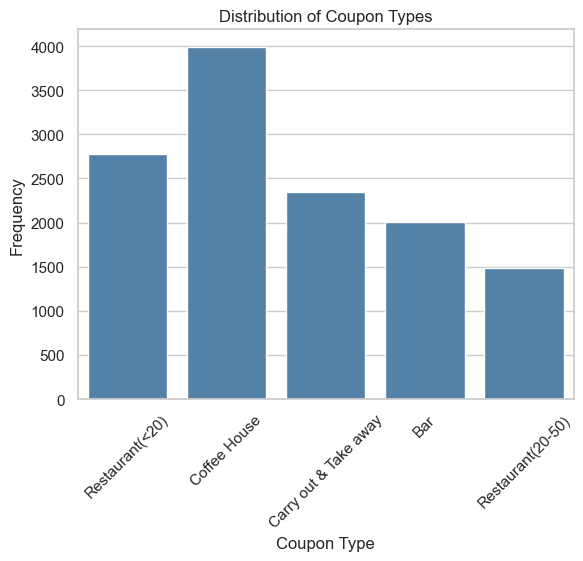

In [333]:
bar_plot = sns.countplot(data=cleaned_data, x='coupon', color='steelblue')
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate the labels for better readability if necessary
plt.show()

6. Use a histogram to visualize the temperature column.

Number of bins: 23


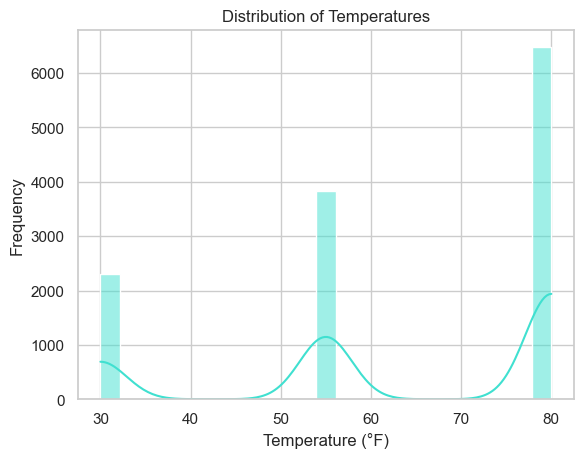

In [334]:
# Calculate the number of bins using the Freedman-Diaconis rule
Q1 = np.percentile(cleaned_data['temperature'], 25)
Q3 = np.percentile(cleaned_data['temperature'], 75)
IQR = Q3 - Q1
bin_width = 2 * IQR * (len(cleaned_data['temperature']) ** (-1/3))
bins = int((data['temperature'].max() - cleaned_data['temperature'].min()) / bin_width)

print("Number of bins:", bins)

sns.histplot(data=cleaned_data, x='temperature', bins=bins, kde=True, color='turquoise')
plt.title('Distribution of Temperatures')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.show()

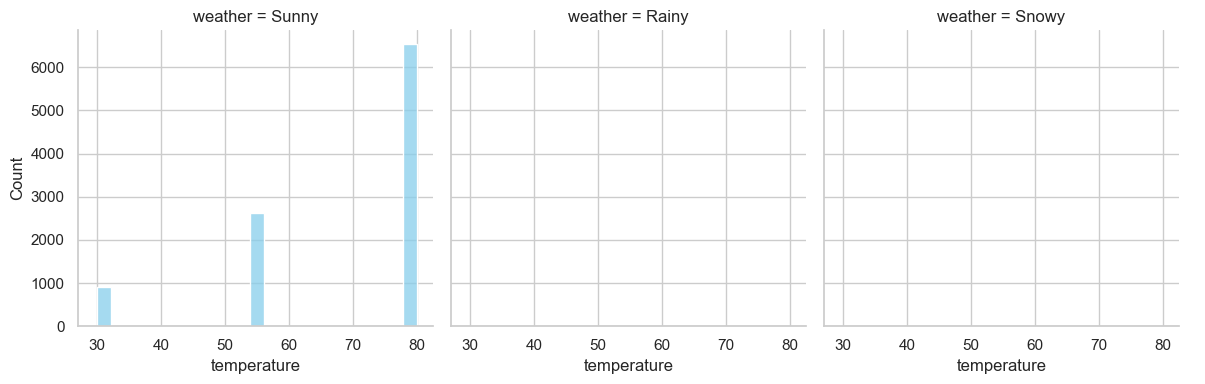

In [335]:
g = sns.FacetGrid(data, col="weather", height=4, aspect=1)
g.map(sns.histplot, "temperature", bins=bins, kde=False, color="skyblue")
g.add_legend()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [336]:
bar_coupons = cleaned_data[cleaned_data['coupon'] == 'Bar']

print(bar_coupons.head())


        destination  passanger weather  temperature      time coupon  \
9   No Urgent Place     Kid(s)   Sunny           80  10:00:00    Bar   
13             Home      Alone   Sunny           55  18:00:00    Bar   
17             Work      Alone   Sunny           55  07:00:00    Bar   
24  No Urgent Place  Friend(s)   Sunny           80  10:00:00    Bar   
35             Home      Alone   Sunny           55  18:00:00    Bar   

   expiration  gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9          1d  Female  21  Unmarried partner  ...        never       NaN   
13         1d  Female  21  Unmarried partner  ...        never       NaN   
17         1d  Female  21  Unmarried partner  ...        never       NaN   
24         1d    Male  21             Single  ...        less1       4~8   
35         1d    Male  21             Single  ...        less1       4~8   

   RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
9                   4~8        

2. What proportion of bar coupons were accepted?


In [337]:
# Calculate the proportion of bar coupons that were accepted
acceptance_rate_bar = bar_coupons['Y'].mean() * 100

print(f"The proportion of bar coupons that were accepted is {acceptance_rate_bar:.2f}%.")

The proportion of bar coupons that were accepted is 41.00%.


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [338]:
# Segmenting the data based on the number of times users go to a bar
less_or_equal_3_times = bar_coupons[bar_coupons['Bar'].isin(['never', 'less1', '1~3'])]
more_than_3_times = bar_coupons[bar_coupons['Bar'].isin(['4~8', 'gt8'])]

# Calculate the acceptance rate for each segment
acceptance_rate_less_or_equal_3 = less_or_equal_3_times['Y'].mean() * 100
acceptance_rate_more_than_3 = more_than_3_times['Y'].mean() * 100

# Print the results
print(f"Acceptance rate for those who went to a bar 3 or fewer times a month: {acceptance_rate_less_or_equal_3:.2f}%")
print(f"Acceptance rate for those who went to a bar more than 3 times a month: {acceptance_rate_more_than_3:.2f}%")


Acceptance rate for those who went to a bar 3 or fewer times a month: 37.04%
Acceptance rate for those who went to a bar more than 3 times a month: 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [339]:
# Condition for drivers over the age of 25 and who go to a bar more than once a month
# Assuming '1~3', '4~8', 'gt8' indicate more than once a month visits
condition_over_25_more_than_once = (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & (~bar_coupons['age'].isin(['below21', '21', '22', '23', '24', '25']))

# Creating DataFrame based on the condition
specific_group_over_25 = bar_coupons[condition_over_25_more_than_once]
other_group = bar_coupons[~condition_over_25_more_than_once]

# Calculate the acceptance rates
acceptance_rate_specific_group = specific_group_over_25['Y'].mean() * 100
acceptance_rate_other_group = other_group['Y'].mean() * 100

# Printing the results
print(f"Acceptance rate for drivers over the age of 25 who go to a bar more than once a month: {acceptance_rate_specific_group:.2f}%")
print(f"Acceptance rate for all other drivers: {acceptance_rate_other_group:.2f}%")


Acceptance rate for drivers over the age of 25 who go to a bar more than once a month: 69.52%
Acceptance rate for all other drivers: 33.46%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [340]:
# Condition for the specified group
condition_specified = (
        bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8']) &  # More than once a month bar visits
        ~bar_coupons['passanger'].isin(['Kid(s)']) &  # No kids as passengers
        ~bar_coupons['occupation'].isin(['Farming Fishing & Forestry'])  # Excluding specific occupations
)

# Creating DataFrame based on the condition
specified_group = bar_coupons[condition_specified]
other_group = bar_coupons[~condition_specified]

# Calculate the acceptance rates
acceptance_rate_specified_group = specified_group['Y'].mean() * 100
acceptance_rate_other_group = other_group['Y'].mean() * 100

print(f"Acceptance rate for drivers who go to bars more than once a month, had no kids as passengers, and are not in the farming, fishing, or forestry occupations: {acceptance_rate_specified_group:.2f}%")
print(f"Acceptance rate for all other drivers: {acceptance_rate_other_group:.2f}%")

Acceptance rate for drivers who go to bars more than once a month, had no kids as passengers, and are not in the farming, fishing, or forestry occupations: 71.32%
Acceptance rate for all other drivers: 29.54%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [341]:
# Defining conditions and corresponding labels
conditions = {
    "Bars more than once a month, no kids as passengers, not widowed": (
            bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8']) &
            ~bar_coupons['passanger'].isin(['Kid(s)']) &
            bar_coupons['maritalStatus'] != 'Widowed'
    ),
    "Bars more than once a month, under age 30": (
            bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8']) &
            bar_coupons['age'].isin(['below 21', '21', '22', '23', '24', '25', '26', '27', '28', '29'])
    ),
    "Cheap restaurants more than 4 times a month, income < $50K": (
            bar_coupons['coupon'].isin(['Restaurant(<20)']) &
            bar_coupons['income'].isin(['less than $12500', '$12500 - $24999', '$25000 - $37499'])
    )
}

# Computing acceptance rates for each condition
results = {}
for label, condition in conditions.items():
    acceptance_rate = bar_coupons[condition]['Y'].mean() * 100
    results[label] = acceptance_rate

for label, rate in results.items():
    print(f"Acceptance rate for {label}: {rate:.2f}%")


Acceptance rate for Bars more than once a month, no kids as passengers, not widowed: 41.00%
Acceptance rate for Bars more than once a month, under age 30: 73.13%
Acceptance rate for Cheap restaurants more than 4 times a month, income < $50K: nan%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### High Acceptance Among Younger Drivers
- **Observation**: There is a significantly higher acceptance rate (73.13%) for bar coupons among drivers under the age of 30.
- **Hypothesis**: Younger drivers may be more inclined to accept bar coupons due to a more active social life or greater interest in nightlife. This demographic might see bar visits as a more appealing activity, especially when incentivized with a coupon.

### Moderate Acceptance Without Specific Restrictions
- **Observation**: The acceptance rate is moderate (41.00%) for drivers who visit bars more than once a month, do not have kids as passengers, and are not widowed.
- **Hypothesis**: This suggests that while frequent bar-goers are receptive to bar coupons, other factors such as having children or marital status (specifically being widowed) might influence their decision to use such coupons. The presence of children as passengers or the social implications of being widowed could make bar visits less appealing or appropriate.

### No Data for Specific Economic Demographic
- **Observation**: The acceptance rate is 'nan%' for drivers who frequently visit cheap restaurants and have an income less than $50K.
- **Hypothesis**: The 'nan%' result suggests a lack of data or insufficient data for this subgroup, indicating that this scenario might be rare or unrecorded in your dataset. This could mean that drivers in this income bracket do not frequently receive or use coupons for cheap restaurants, or the data collection did not capture enough instances to provide a meaningful analysis.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [342]:
def plot_acceptance_by_time(data, coupon_type):
    plt.figure(figsize=(10, 5))  # Ensure a new figure is created for each plot
    sns.countplot(x='time', hue='Y', data=data, palette='coolwarm', order=sorted(data['time'].unique()))
    plt.title(f'Acceptance Rates of {coupon_type} Coupons by Time of Day')
    plt.xlabel('Time of Day')
    plt.ylabel('Count')
    plt.legend(title='Coupon Accepted', labels=['No', 'Yes'])
    plt.show()
    plt.close()


In [343]:
def plot_acceptance_by_income(coupon_data, coupon_type):
    # Define the income order from lowest to highest explicitly
    income_order = ['Less than $12500', '$12500 - $24999', '$25000 - $37499',
                    '$37500 - $49999', '$50000 - $62499', '$62500 - $74999',
                    '$75000 - $87499', '$87500 - $99999', '$100000 or More']

    plt.figure(figsize=(12, 6))  # Adjust size as needed
    sns.countplot(x='income', hue='Y', data=coupon_data, palette='viridis', order=income_order)
    plt.title(f'Acceptance Rates by Income Level for {coupon_type} Coupons')
    plt.xlabel('Income')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Coupon Accepted', labels=['No', 'Yes'])
    plt.show()
    plt.close()



In [344]:
def plot_acceptance_by_gender_and_age(data, coupon_type):
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='gender', y='age', hue='Y', data=data, split=True, palette={0: "red", 1: "green"})
    plt.title(f'Acceptance by Gender and Age  for {coupon_type} Coupons')
    plt.xlabel('Gender')
    plt.ylabel('Age')
    plt.legend(title='Coupon Accepted', labels=['No', 'Yes'])
    plt.show()
    plt.close()

In [345]:
def plot_acceptance_by_age_and_occupation(data, coupon_type):
    pivot_table = data.pivot_table(index='occupation', columns='age', values='Y', aggfunc='mean')

    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Acceptance Rate by Occupation and Age for {coupon_type} Coupons')
    plt.xlabel('Age Group')
    plt.ylabel('Occupation')
    plt.show()
    plt.close()

In [346]:
def plot_acceptance_by_education_and_occupation(data, coupon_type):
    # Create a pivot table with mean acceptance rates across education and occupation
    pivot_table = data.pivot_table(index='occupation', columns='education', values='Y', aggfunc='mean')

    plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2f")  # Annotate cells with formatted numbers
    plt.title(f'Acceptance Rate by Occupation and Education for {coupon_type} Coupons')
    plt.xlabel('Education Level')
    plt.ylabel('Occupation')
    plt.xticks(rotation=45)  # Rotate x labels for better visibility if needed
    plt.tight_layout()  # Adjust layout to fit everything neatly
    plt.show()
    plt.close()

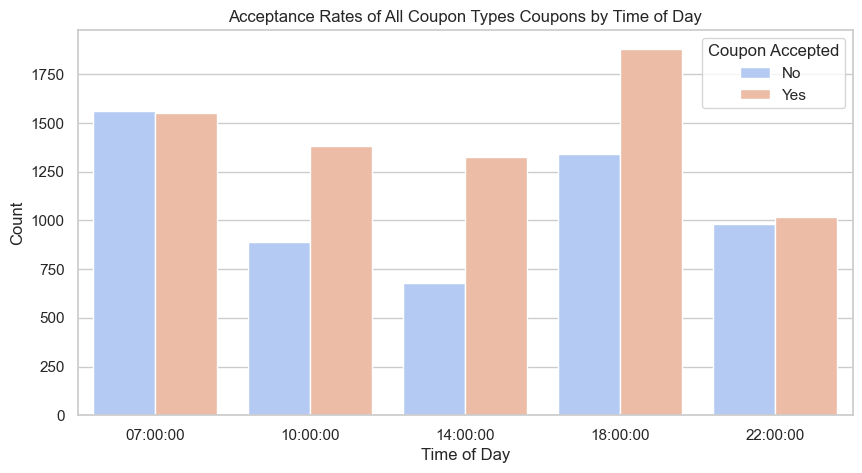

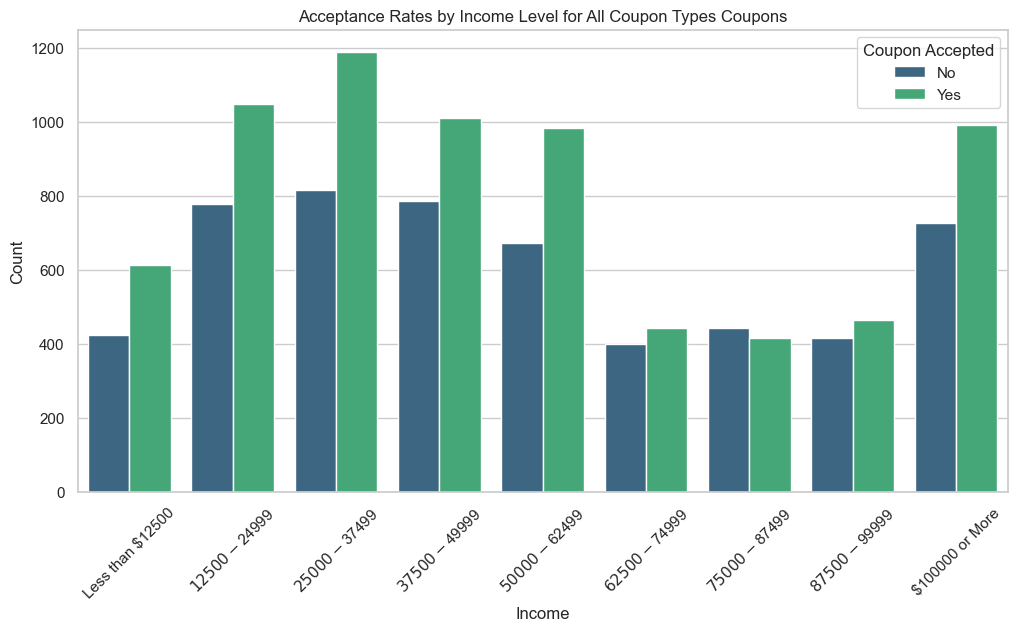

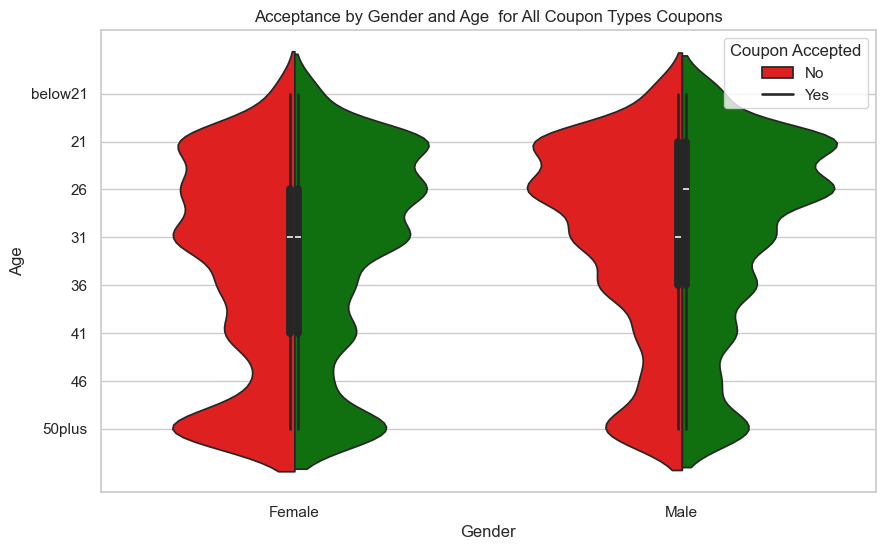

C:\Users\erikp\AppData\Local\Temp\ipykernel_44248\3100692905.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = data.pivot_table(index='occupation', columns='age', values='Y', aggfunc='mean')


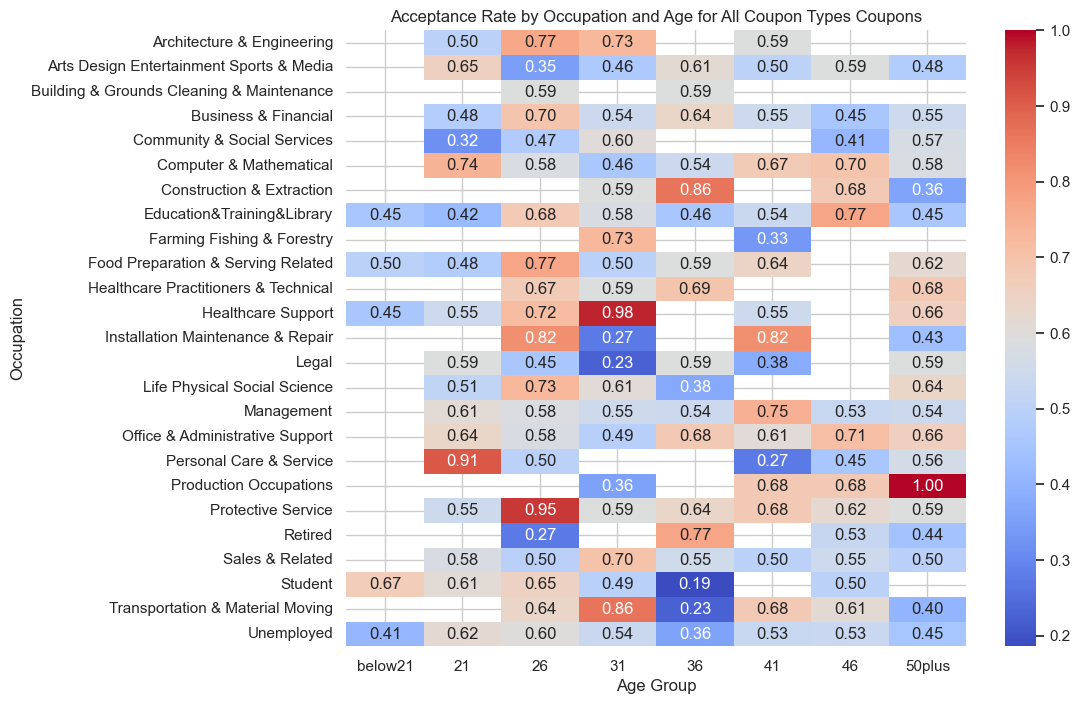

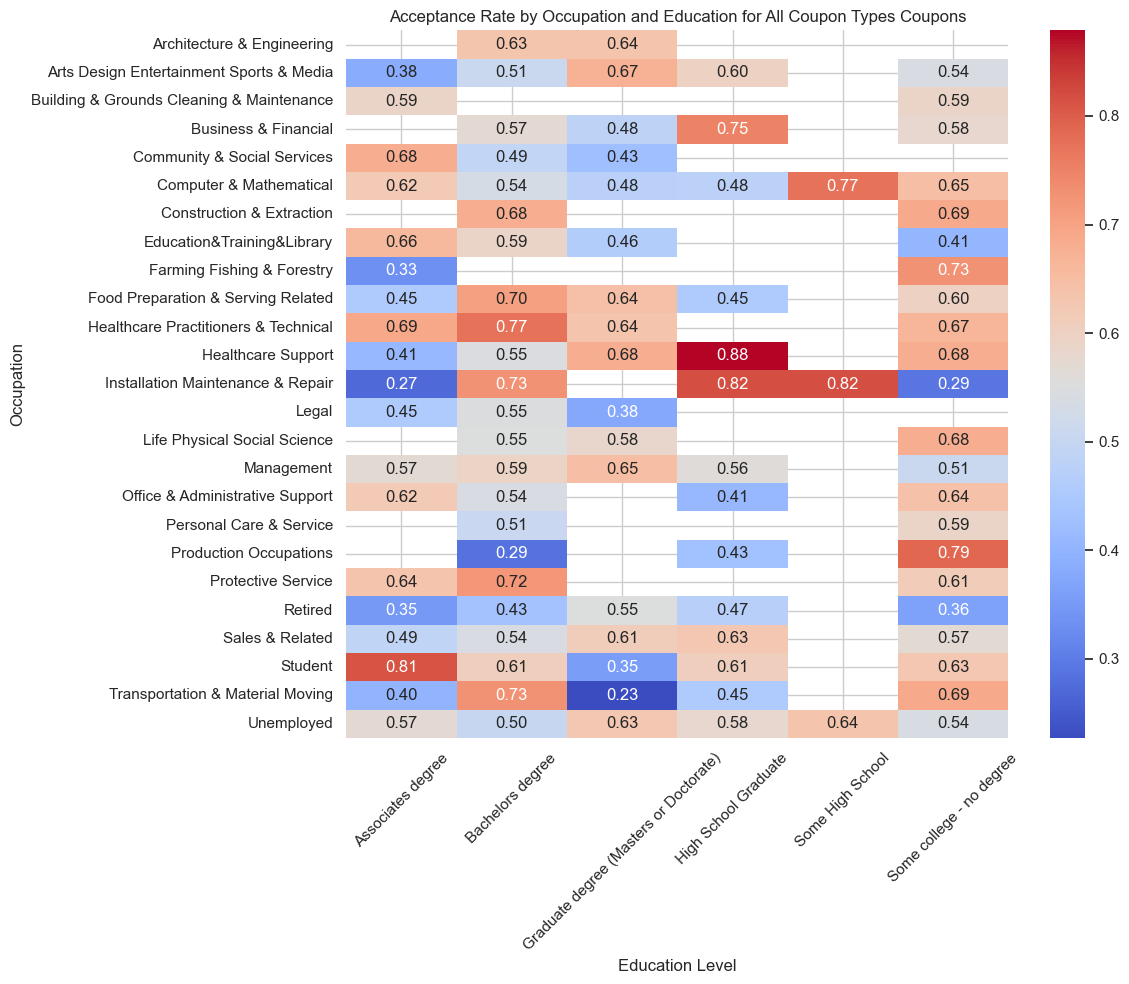

Unique coupon types in the dataset: ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']


----------------------------------------
Starting analysis for Restaurant(<20) Coupons:
----------------------------------------
Data size for Restaurant(<20) coupons: (2779, 25)

Descriptive Statistics:
            destination passanger weather  temperature      time  \
count              2779      2779    2779  2779.000000      2779   
unique                3         4       3          NaN         5   
top     No Urgent Place     Alone   Sunny          NaN  18:00:00   
freq               1714      1430    2237          NaN       748   
mean                NaN       NaN     NaN    64.220943       NaN   
std                 NaN       NaN     NaN    19.790919       NaN   
min                 NaN       NaN     NaN    30.000000       NaN   
25%                 NaN       NaN     NaN    55.000000       NaN   
50%                 NaN       NaN     NaN    80.000000      

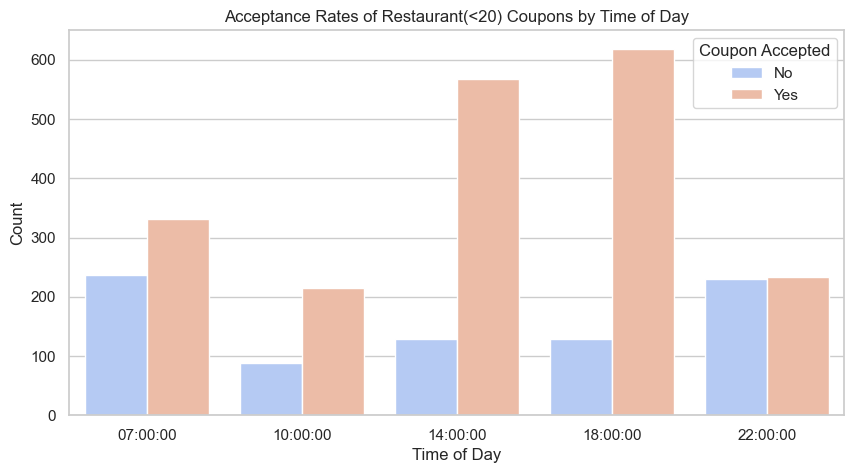

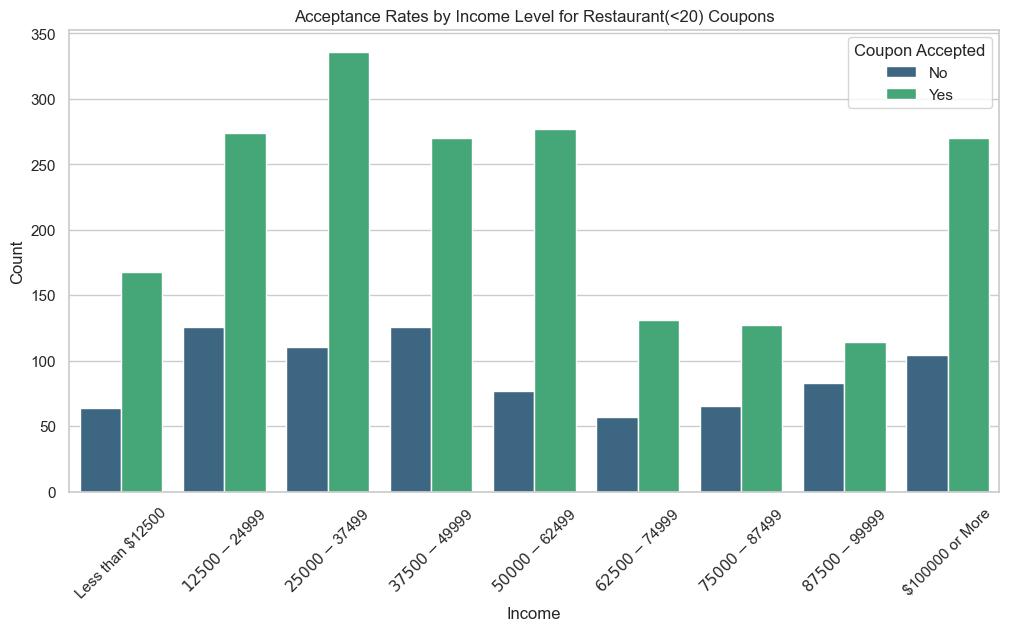

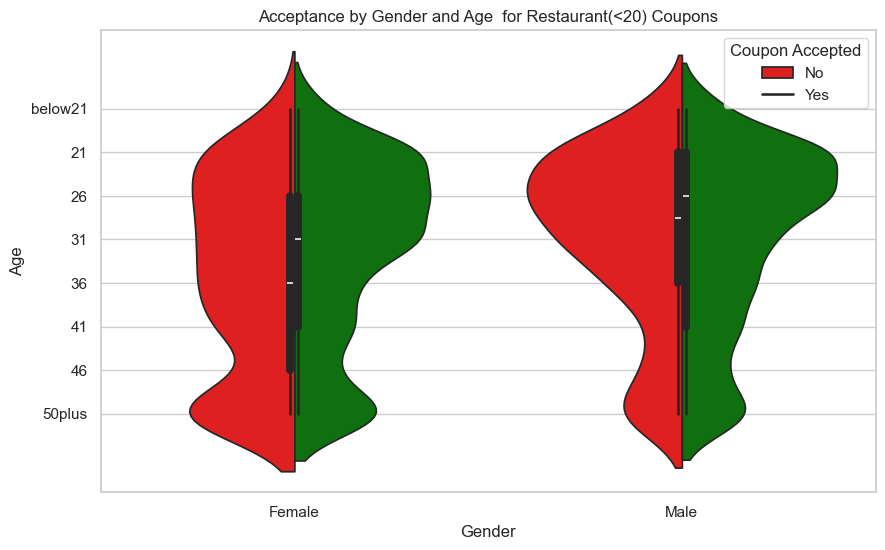

C:\Users\erikp\AppData\Local\Temp\ipykernel_44248\3100692905.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = data.pivot_table(index='occupation', columns='age', values='Y', aggfunc='mean')


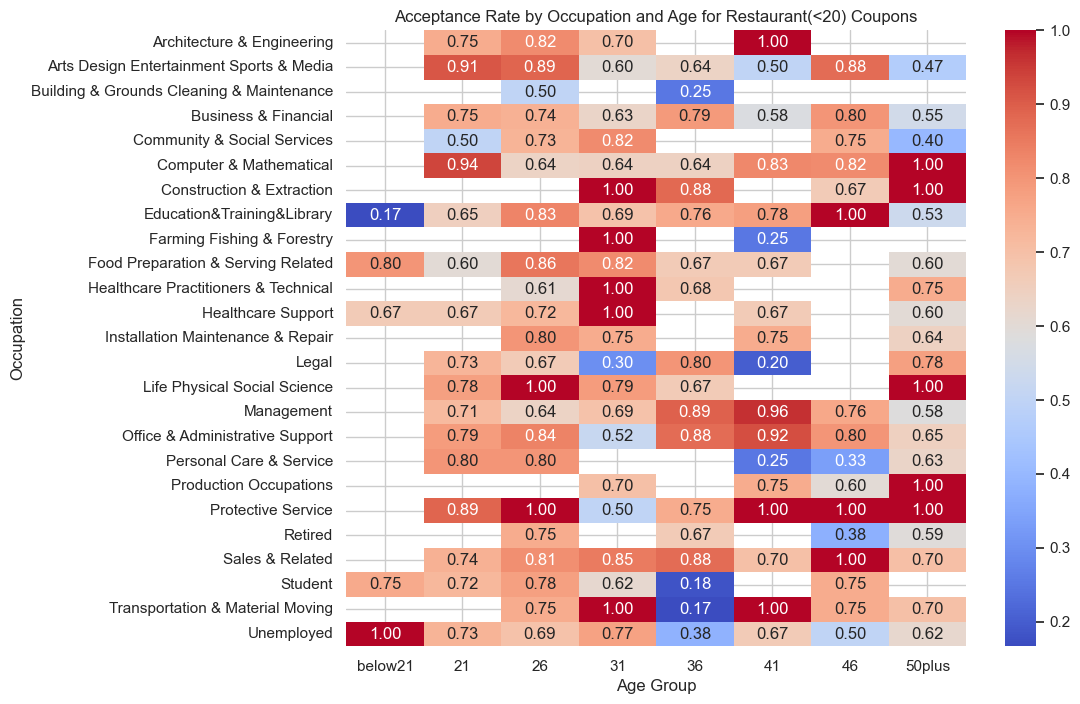

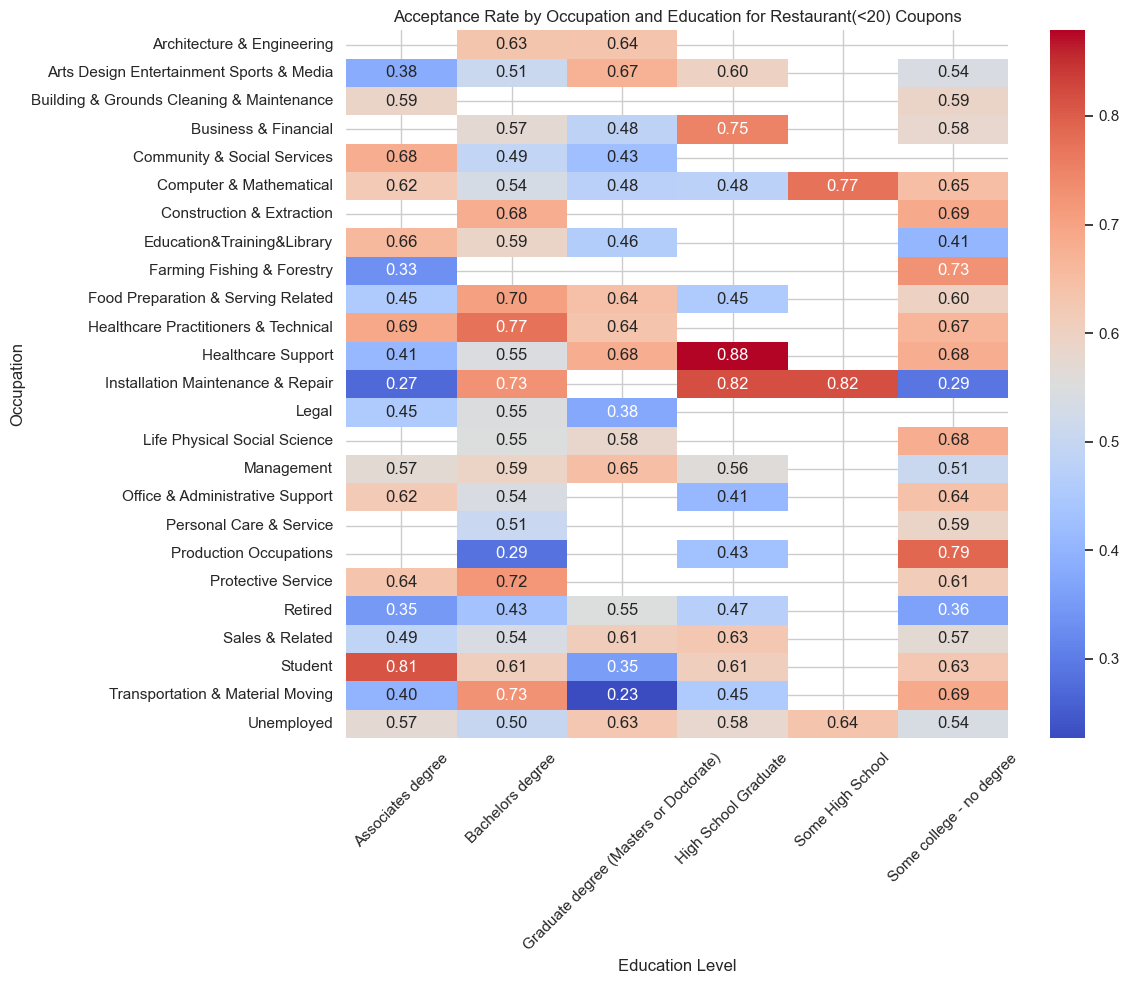



----------------------------------------
Starting analysis for Coffee House Coupons:
----------------------------------------
Data size for Coffee House coupons: (3989, 25)

Descriptive Statistics:
            destination passanger weather  temperature      time  \
count              3989      3989    3989  3989.000000      3989   
unique                3         4       3          NaN         5   
top     No Urgent Place     Alone   Sunny          NaN  18:00:00   
freq               2150      2253    3461          NaN      1088   
mean                NaN       NaN     NaN    68.035849       NaN   
std                 NaN       NaN     NaN    15.980067       NaN   
min                 NaN       NaN     NaN    30.000000       NaN   
25%                 NaN       NaN     NaN    55.000000       NaN   
50%                 NaN       NaN     NaN    80.000000       NaN   
75%                 NaN       NaN     NaN    80.000000       NaN   
max                 NaN       NaN     NaN    80.0000

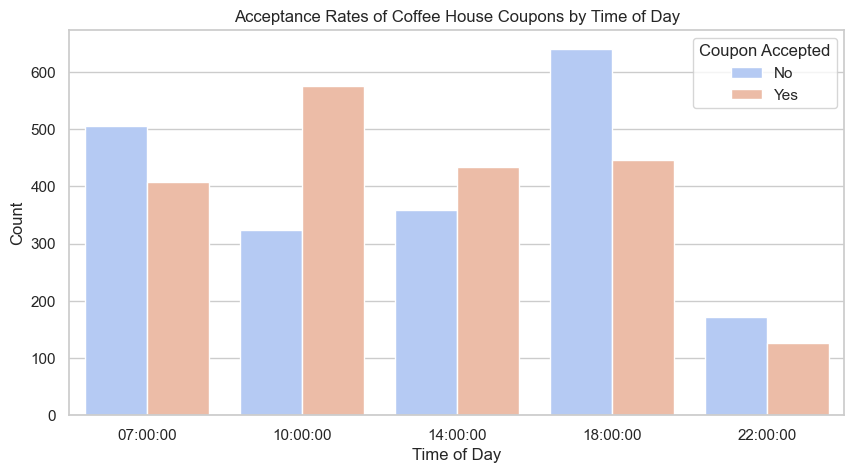

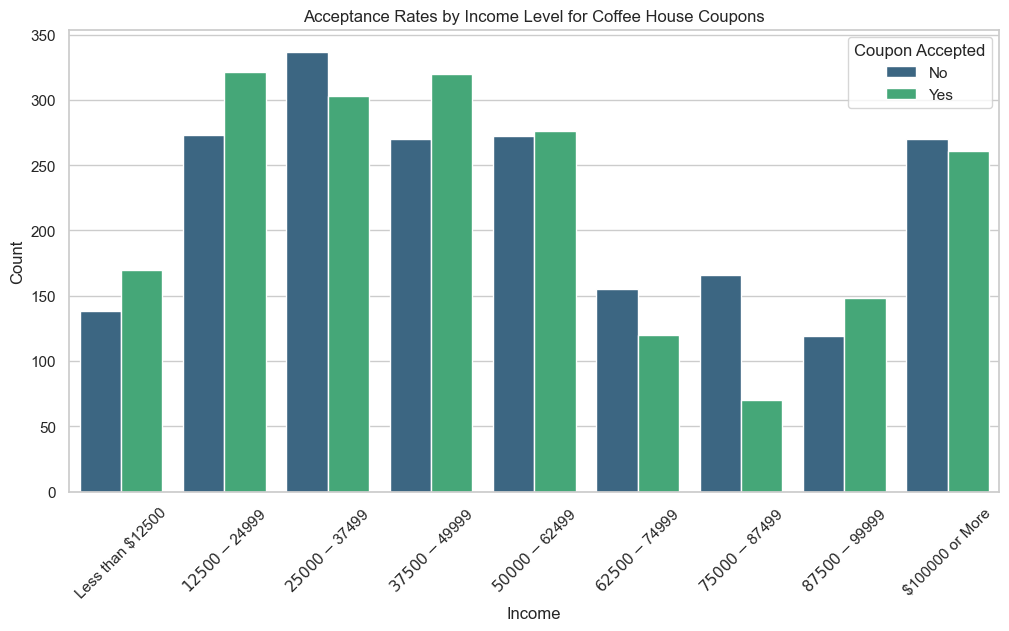

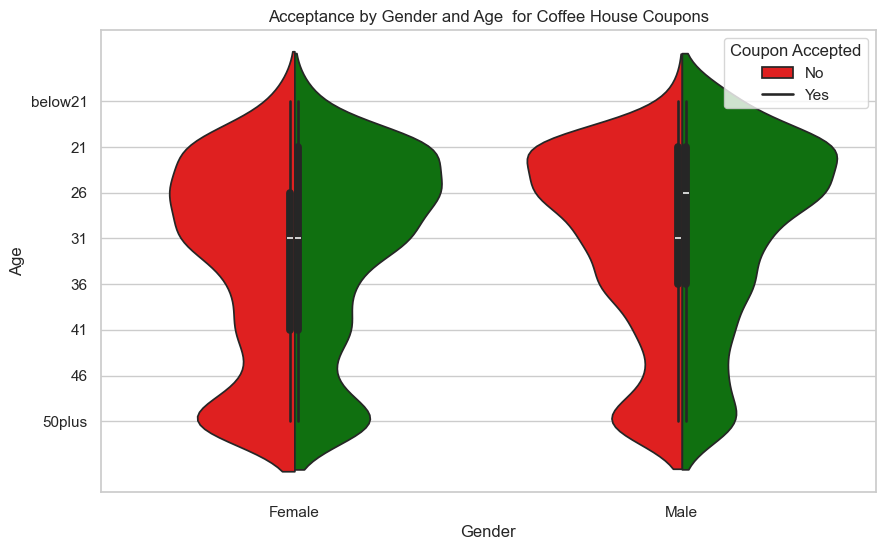

C:\Users\erikp\AppData\Local\Temp\ipykernel_44248\3100692905.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = data.pivot_table(index='occupation', columns='age', values='Y', aggfunc='mean')


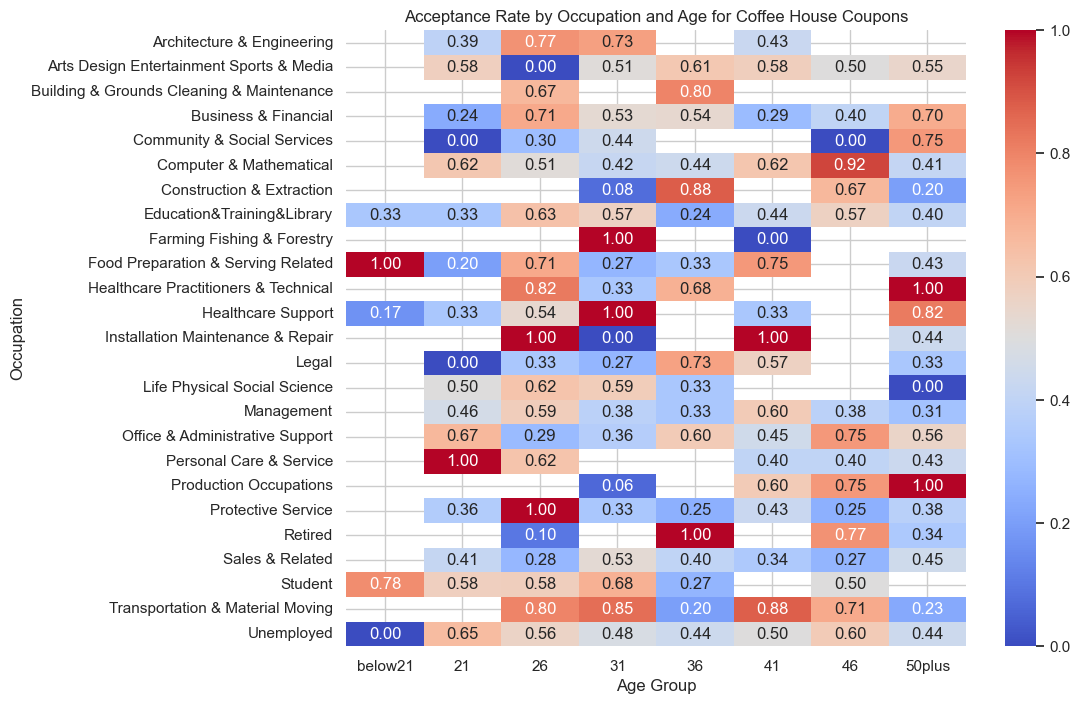

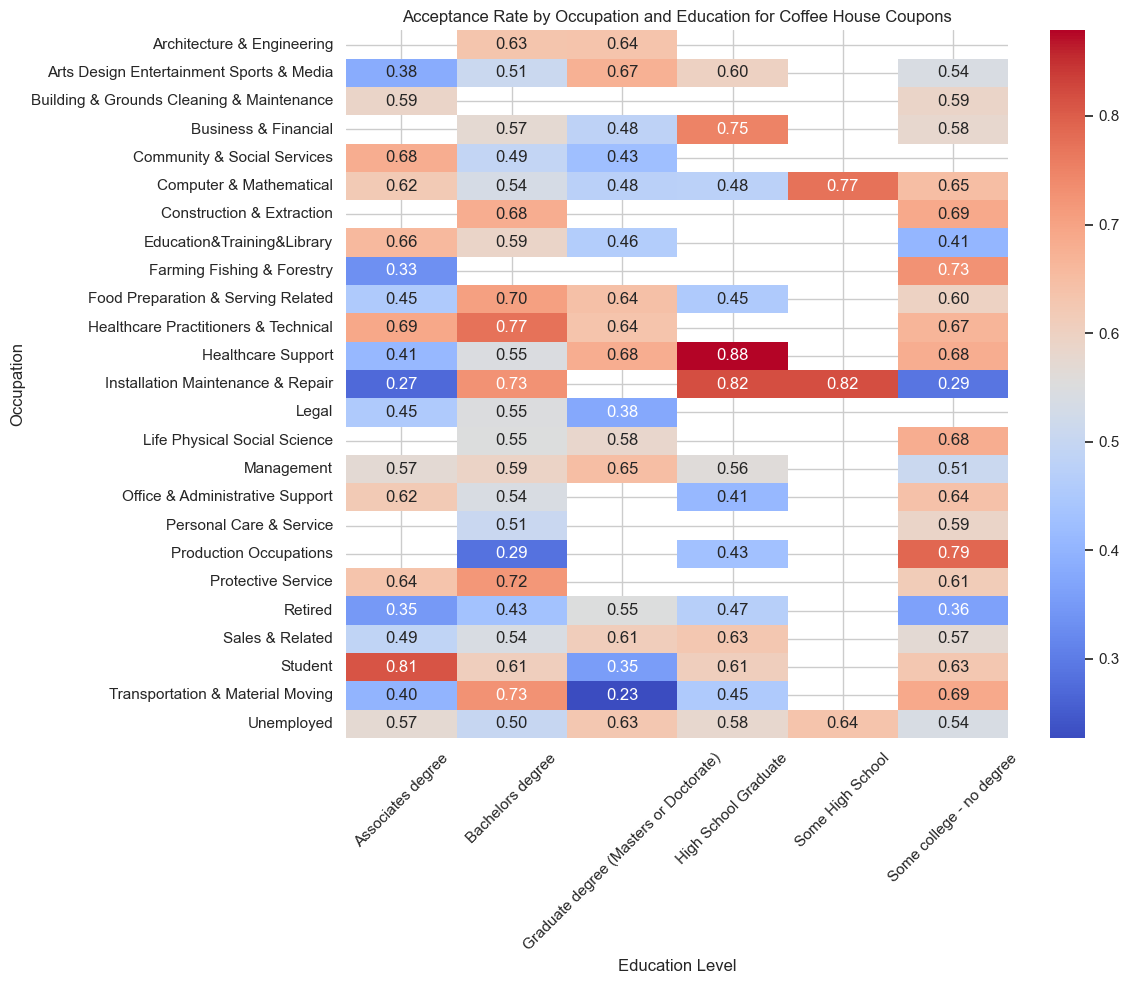



----------------------------------------
Starting analysis for Carry out & Take away Coupons:
----------------------------------------
Data size for Carry out & Take away coupons: (2344, 25)

Descriptive Statistics:
            destination passanger weather  temperature      time  \
count              2344      2344    2344  2344.000000      2344   
unique                3         4       3          NaN         5   
top     No Urgent Place     Alone   Sunny          NaN  07:00:00   
freq                974      1361    1722          NaN       719   
mean                NaN       NaN     NaN    57.943686       NaN   
std                 NaN       NaN     NaN    21.528634       NaN   
min                 NaN       NaN     NaN    30.000000       NaN   
25%                 NaN       NaN     NaN    30.000000       NaN   
50%                 NaN       NaN     NaN    55.000000       NaN   
75%                 NaN       NaN     NaN    80.000000       NaN   
max                 NaN       NaN 

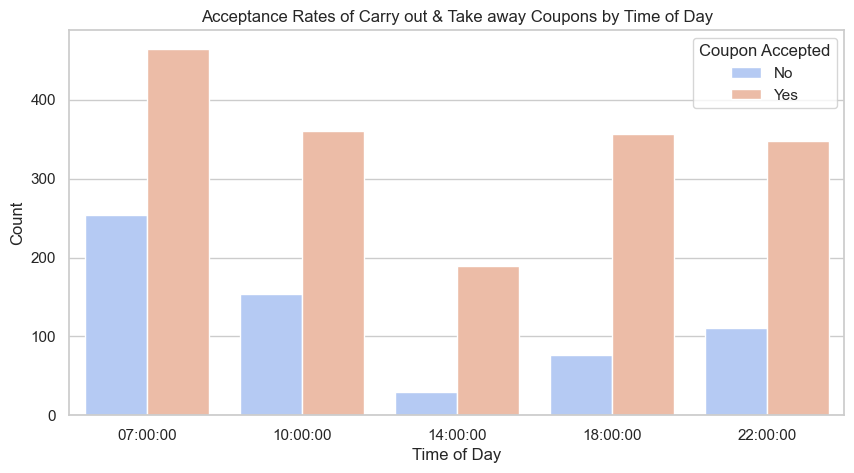

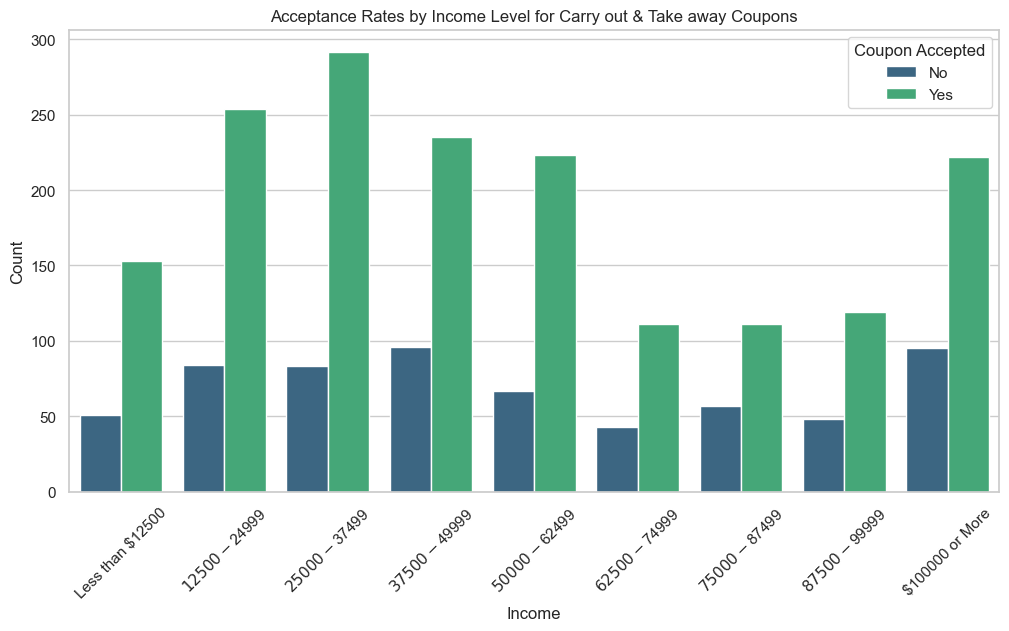

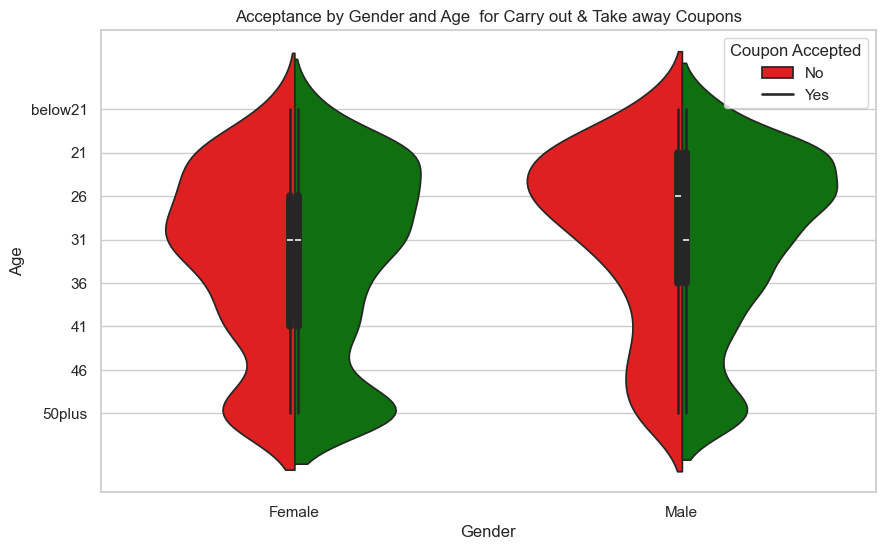

C:\Users\erikp\AppData\Local\Temp\ipykernel_44248\3100692905.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = data.pivot_table(index='occupation', columns='age', values='Y', aggfunc='mean')


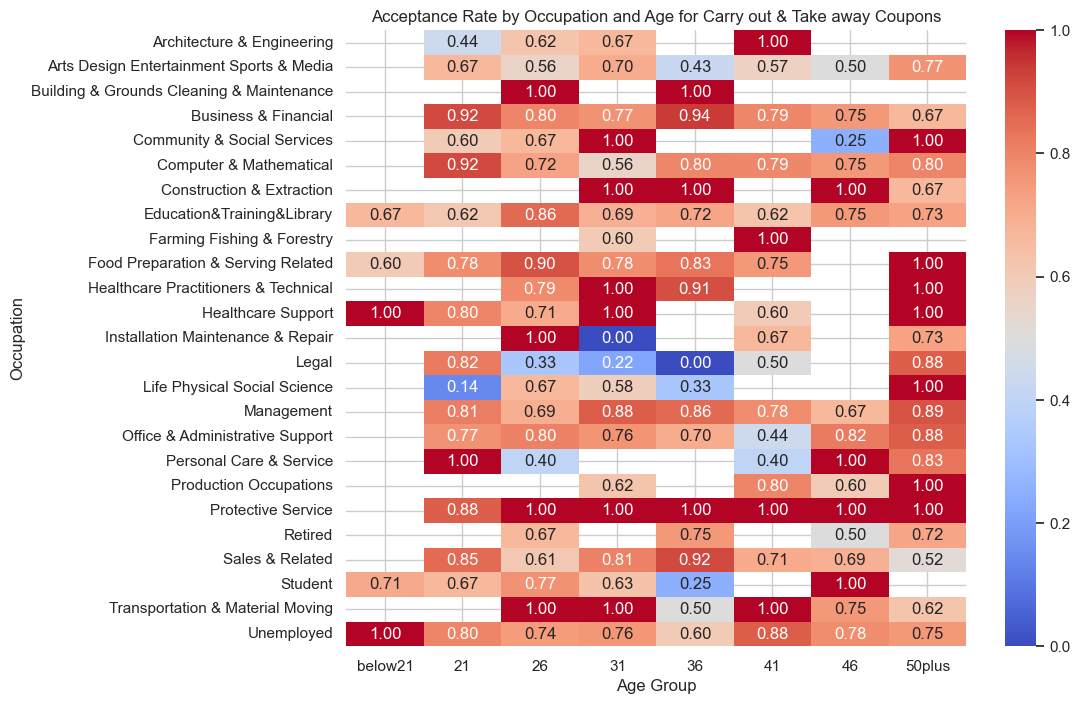

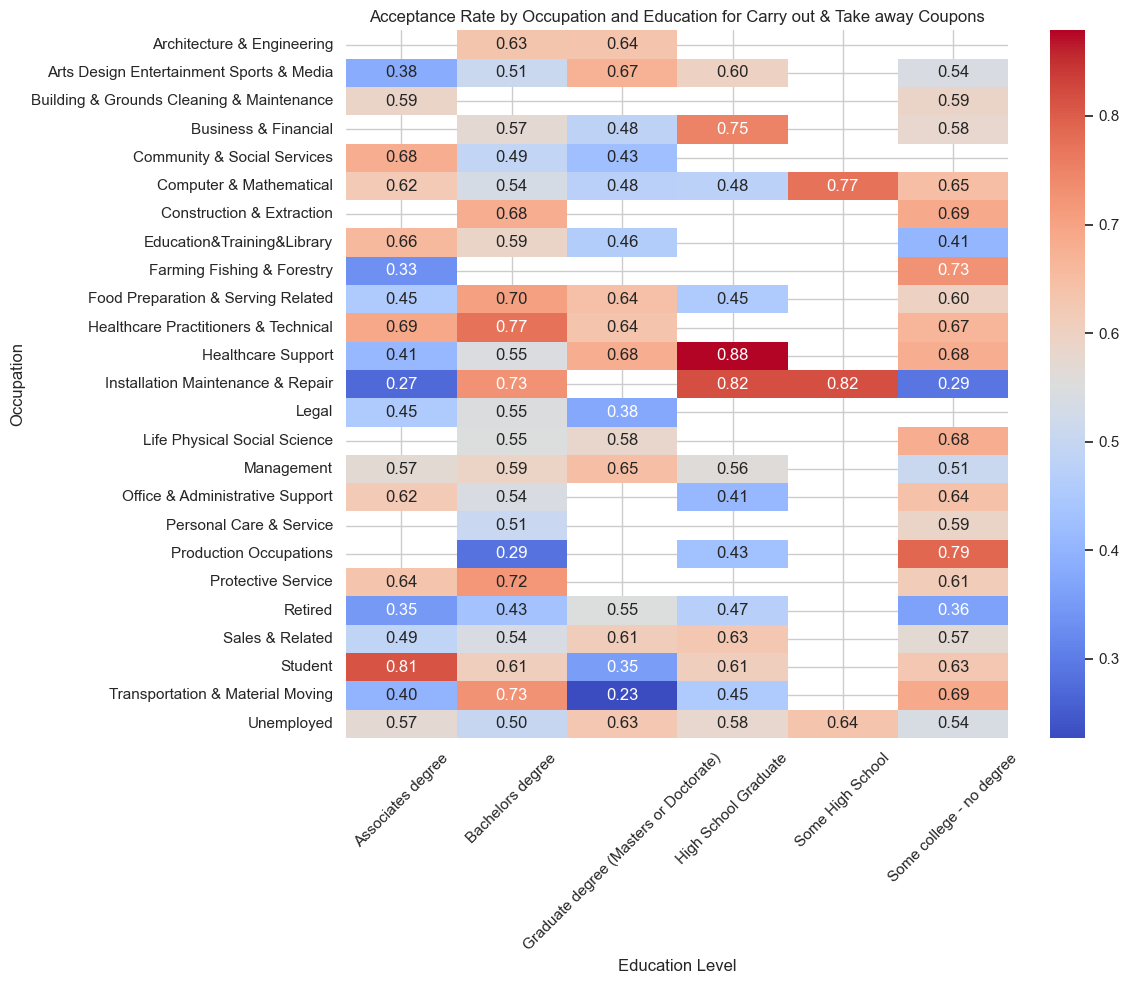



----------------------------------------
Starting analysis for Bar Coupons:
----------------------------------------
Data size for Bar coupons: (2010, 25)

Descriptive Statistics:
            destination passanger weather  temperature      time coupon  \
count              2010      2010    2010  2010.000000      2010   2010   
unique                3         4       3          NaN         5      1   
top     No Urgent Place     Alone   Sunny          NaN  18:00:00    Bar   
freq               1019      1198    1345          NaN       563   2010   
mean                NaN       NaN     NaN    57.599502       NaN    NaN   
std                 NaN       NaN     NaN    17.946364       NaN    NaN   
min                 NaN       NaN     NaN    30.000000       NaN    NaN   
25%                 NaN       NaN     NaN    55.000000       NaN    NaN   
50%                 NaN       NaN     NaN    55.000000       NaN    NaN   
75%                 NaN       NaN     NaN    80.000000       NaN    

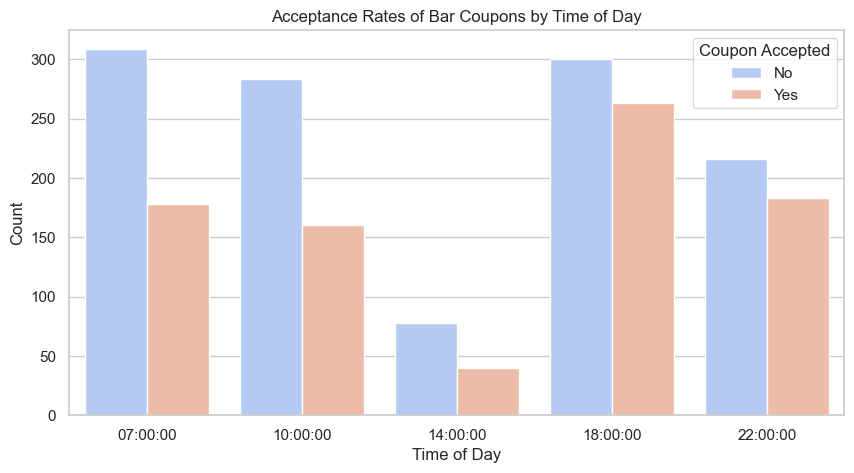

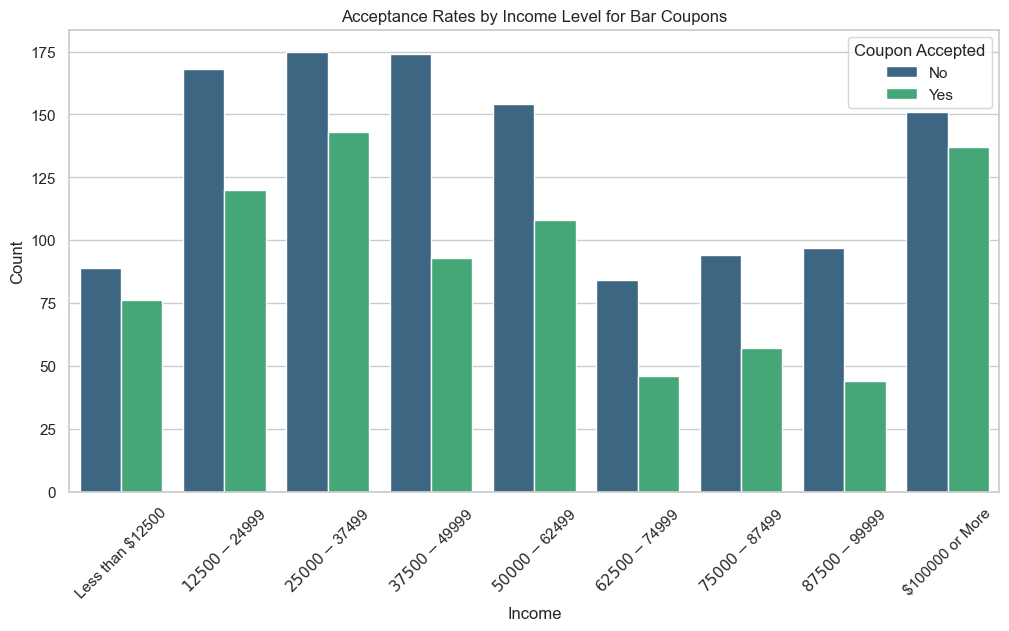

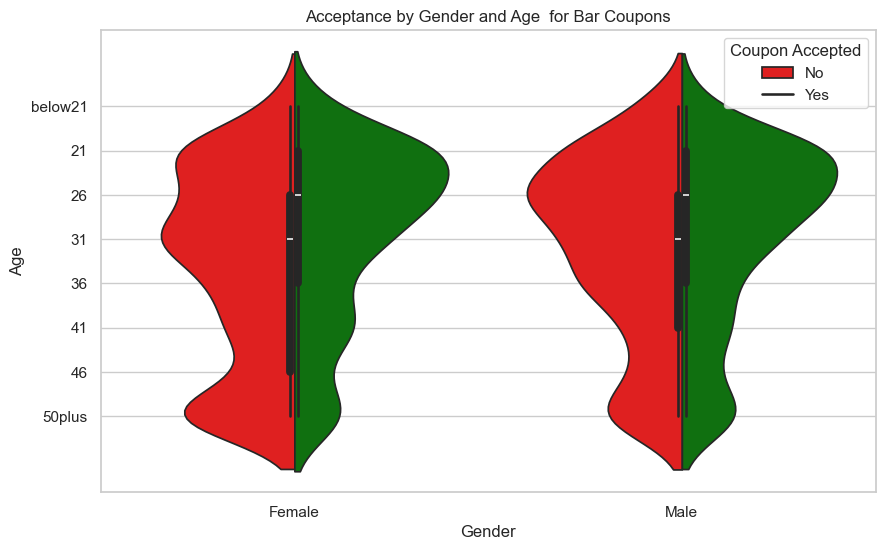

C:\Users\erikp\AppData\Local\Temp\ipykernel_44248\3100692905.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = data.pivot_table(index='occupation', columns='age', values='Y', aggfunc='mean')


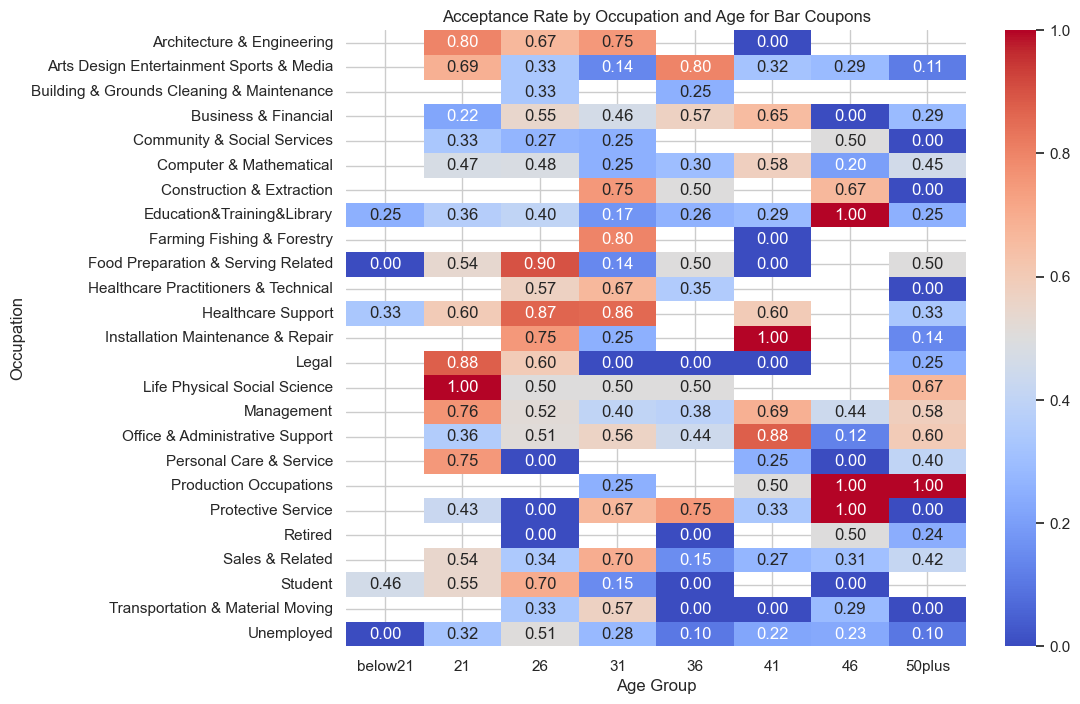

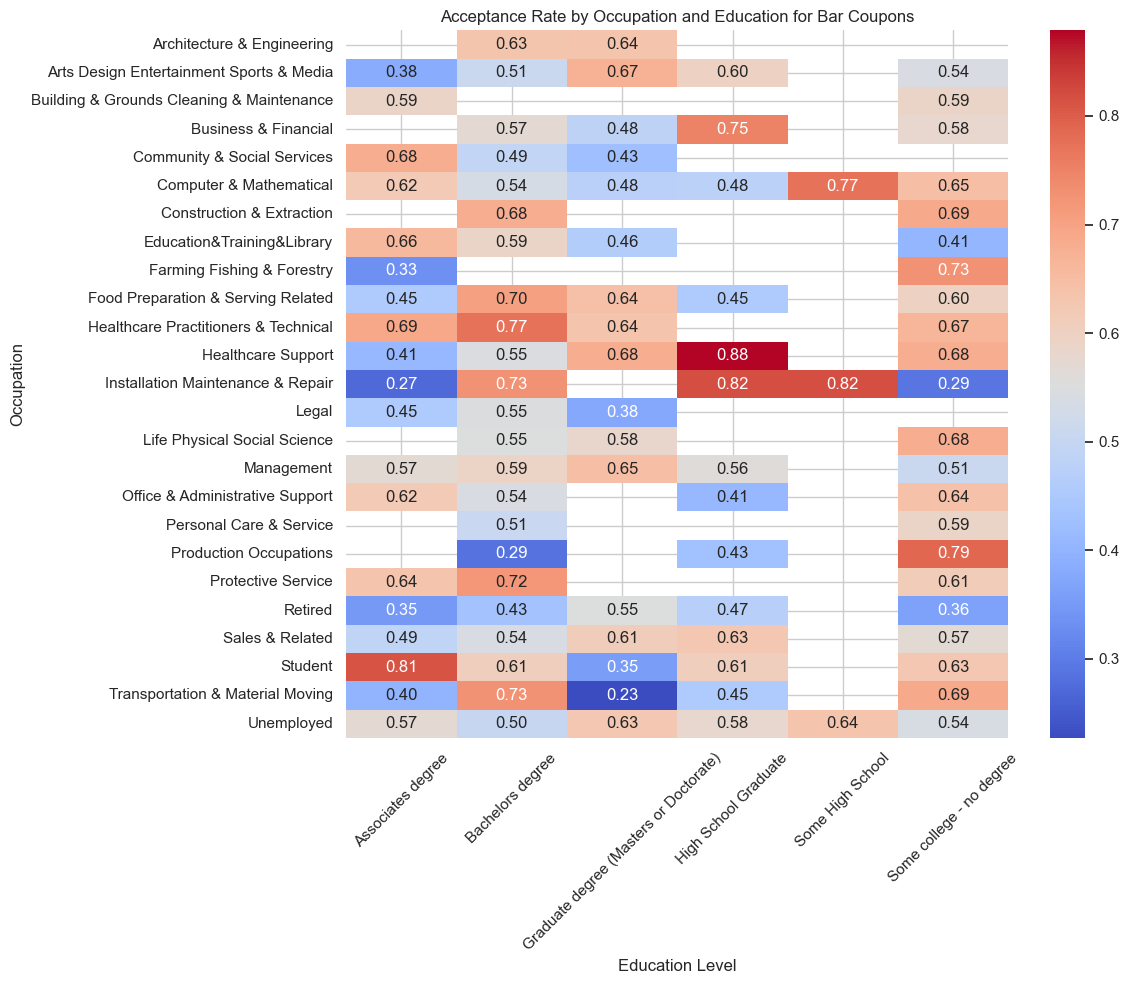



----------------------------------------
Starting analysis for Restaurant(20-50) Coupons:
----------------------------------------
Data size for Restaurant(20-50) coupons: (1488, 25)

Descriptive Statistics:
       destination passanger weather  temperature      time  \
count         1488      1488    1488  1488.000000      1488   
unique           3         4       3          NaN         5   
top           Home     Alone   Sunny          NaN  07:00:00   
freq           652      1006    1246          NaN       427   
mean           NaN       NaN     NaN    64.744624       NaN   
std            NaN       NaN     NaN    19.383625       NaN   
min            NaN       NaN     NaN    30.000000       NaN   
25%            NaN       NaN     NaN    55.000000       NaN   
50%            NaN       NaN     NaN    80.000000       NaN   
75%            NaN       NaN     NaN    80.000000       NaN   
max            NaN       NaN     NaN    80.000000       NaN   

                   coupon expirat

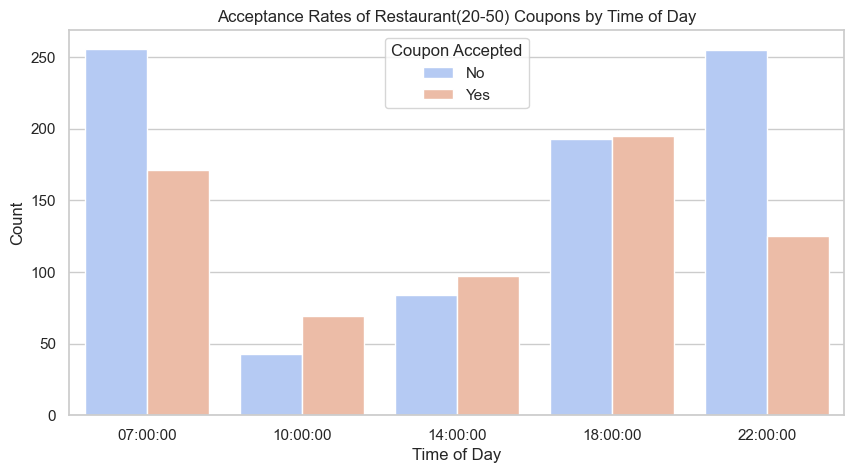

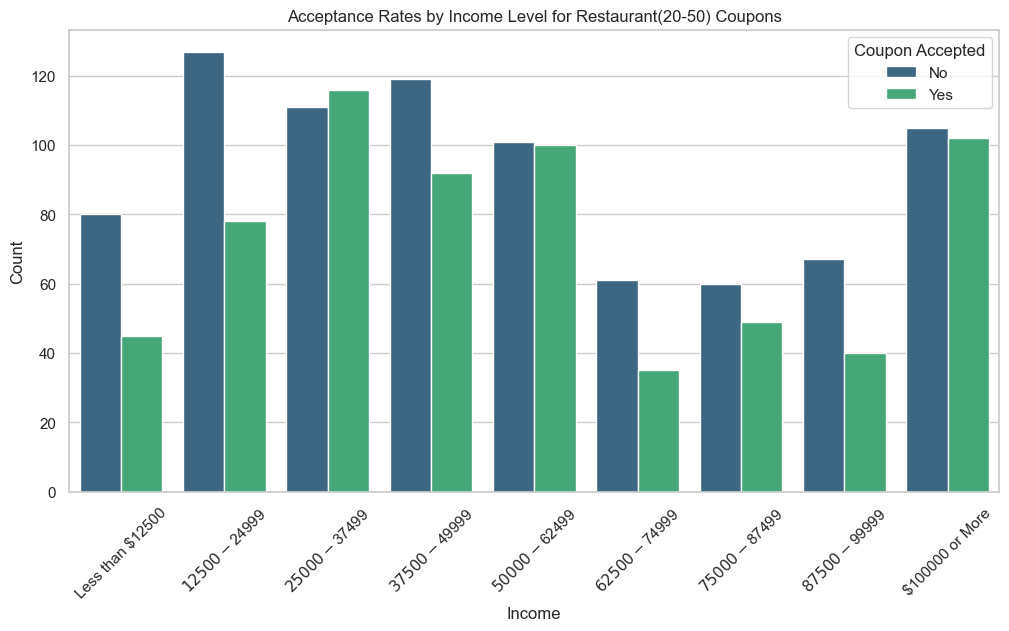

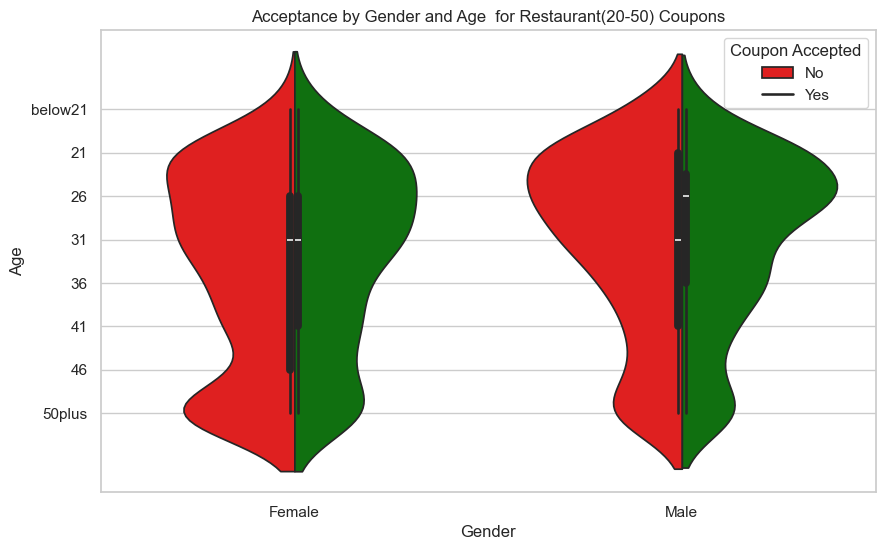

C:\Users\erikp\AppData\Local\Temp\ipykernel_44248\3100692905.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = data.pivot_table(index='occupation', columns='age', values='Y', aggfunc='mean')


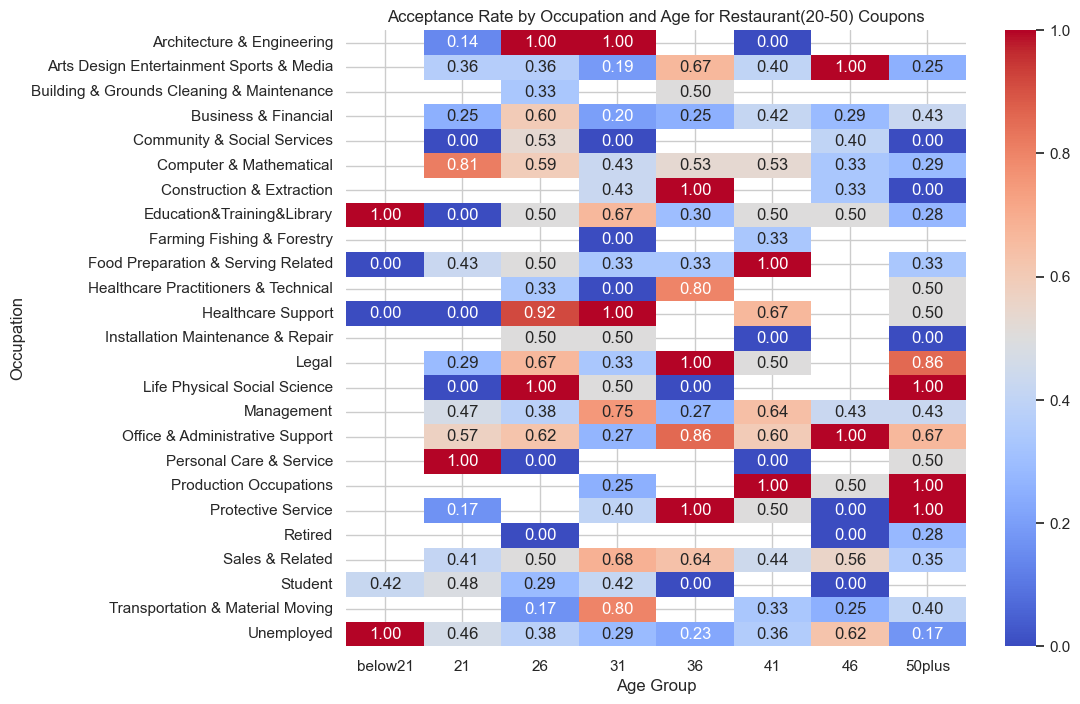

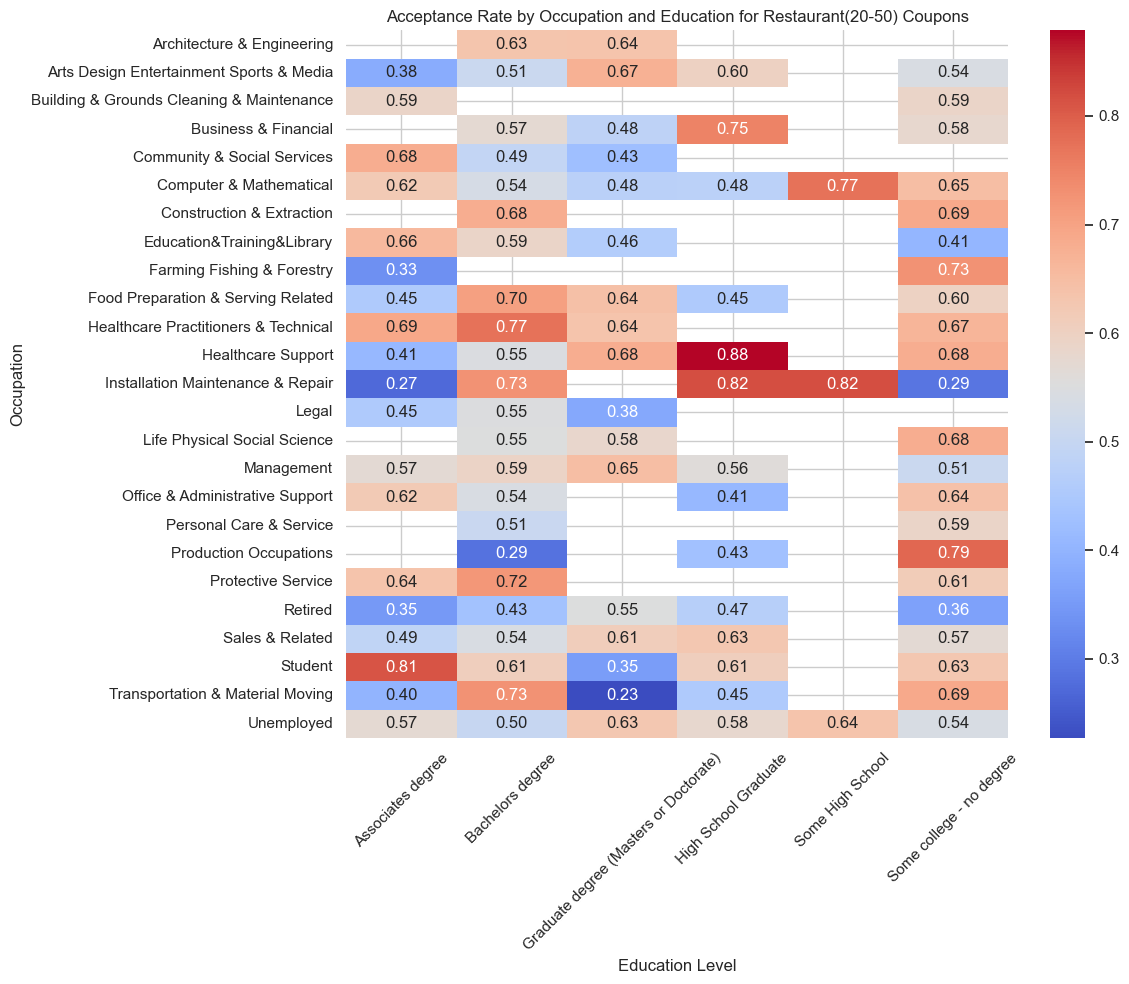

In [347]:
plot_acceptance_by_time(cleaned_data, 'All Coupon Types')
plot_acceptance_by_income(cleaned_data, 'All Coupon Types')
plot_acceptance_by_gender_and_age(cleaned_data, 'All Coupon Types')
plot_acceptance_by_age_and_occupation(cleaned_data, 'All Coupon Types')
plot_acceptance_by_education_and_occupation(cleaned_data, 'All Coupon Types')
    
coupon_types = cleaned_data['coupon'].unique()
print("Unique coupon types in the dataset:", coupon_types)

for coupon in coupon_types:
    print(f"\n\n----------------------------------------")
    print(f"Starting analysis for {coupon} Coupons:")
    print("----------------------------------------")
    coupon_data = cleaned_data[cleaned_data['coupon'] == coupon]

    # Debug: Print the size of the filtered data to check it's not empty
    print(f"Data size for {coupon} coupons:", coupon_data.shape)

    if coupon_data.empty:
        print(f"No data available for {coupon} coupons. Skipping...")
        continue

    # Call each function with coupon as an argument for better titles
    descriptive_statistics(coupon_data)
    plot_acceptance_by_time(coupon_data, coupon)
    plot_acceptance_by_income(coupon_data, coupon)
    plot_acceptance_by_gender_and_age(coupon_data, coupon)
    plot_acceptance_by_age_and_occupation(coupon_data, coupon)
    plot_acceptance_by_education_and_occupation(cleaned_data, coupon)
    